# <font color=pink>Ferramentas utilizadas e suas versões:</font>

Pip  - 22.3.1 <br>
Visual Studio Code - 1.73.1 <br>
Python - 3.10.7 
<br><br>

<font color=pink>Bibliotecas:</font>

pandas<br>
numpy<br>
html5lib<br>
lxml<br>
seaborn

# <font color=pink>
---

# <font color=green> 1 - Criando DataFrame de alunos
---

In [109]:
import pandas as pd

## Utilizando <font color=green>json

In [110]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')

In [111]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [112]:
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [113]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [114]:
nomes_f.sample(5) # sortear

,nome,regiao,freq,rank,sexo
62,FLAVIA,0,232838,63,F
144,LORENA,0,111906,145,F
133,BRENDA,0,120624,134,F
78,SILVIA,0,203901,79,F
152,LARA,0,105741,153,F


In [115]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


## Juntando os dois DataFrames

In [116]:
frames = [nomes_f, nomes_m]

In [117]:
nomes = pd.concat(frames)['nome'].to_frame() # concatenar apenas a coluna nome

In [118]:
nomes.sample(5)

,nome
120,JOSIANE
143,OTAVIO
148,JANETE
170,ALEXANDRO
124,LAIS


## Incluindo ID dos alunos

In [119]:
import numpy as np

In [120]:
np.random.seed(123)

In [121]:
total_alunos = len(nomes)

In [122]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1 # gera número aleatório

In [123]:
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


## Incluindo email de alunos

In [124]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']

In [125]:
nomes['dominio'] = np.random.choice(dominios, total_alunos) # escolhe email aleatório 

In [126]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com


In [127]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [128]:
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com


# <font color=green> 2 - Criando DataFrame de cursos
---

## Criando a tabela cursos

In [129]:
import html5lib

In [130]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

## Utilizando site 

In [131]:
# cursos = pd.read_html(url) **********site offline

## Alternativa devido a site offline, criação do DataFrame a partir de lista de cursos

In [132]:
list = ['Lógica de programação', 'Java para Web', 'C# para Web', 'Ruby on Rails', 'Cursos de Python', 'PHP com MySql', '.NET para web', 'Novas integrações com Java', 'TDD com Java', 'Código limpo com C#', 'Preparatório para certificação Java',
'Hardware básico', 'Persistência com .NET', 'Desenvolvendo jogos', 'Análise de dados', 'Estatística básica', 'Internet das coisas', 'Programação funcional', 'Boas práticas em Java', 'Orientação objetos com Java']

In [133]:
cursos = pd.DataFrame(data=list, columns=['Nome do Curso'])

In [134]:
cursos

,Nome do Curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [135]:
type(cursos)

pandas.core.frame.DataFrame

## Alterando nome da coluna

In [136]:
cursos = cursos.rename(columns={'Nome do Curso': 'nome_do_curso'})

In [137]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


## Alterando o id do curso

In [138]:
cursos['id'] = cursos.index + 1

In [139]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [140]:
cursos = cursos.set_index('id')

In [141]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# <font color=green> 3 - Trabalhando com alunos e cursos
---

## Matriculando os alunos nos cursos

In [142]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [143]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,3
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,3
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,3


In [144]:
nomes.matriculas.describe()

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

## Distribuição de alunos matriculados em cursos

In [145]:
import seaborn as sns

C:\Users\kamil\AppData\Local\Temp\ipykernel_9280\828223504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nomes.matriculas)


<AxesSubplot: xlabel='matriculas', ylabel='Density'>

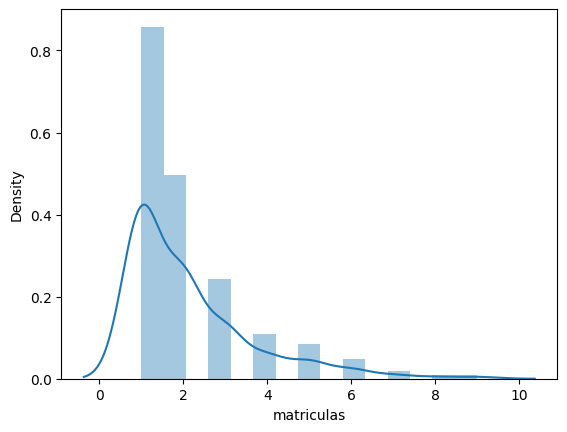

In [146]:
sns.distplot(nomes.matriculas)

<AxesSubplot: xlabel='matriculas', ylabel='Count'>

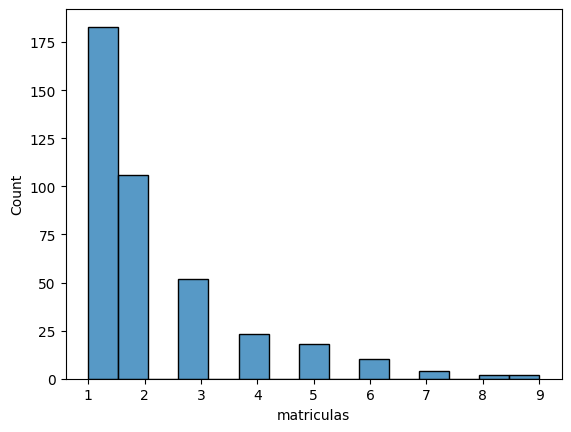

In [147]:
sns.histplot(nomes.matriculas)

In [148]:
nomes.matriculas.value_counts()

1    183
2    106
3     52
4     23
5     18
6     10
7      4
8      2
9      2
Name: matriculas, dtype: int64

## Selecionando cursos para alunos

In [149]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
93,ELIANA,372,@servicodoemail.com,eliana@servicodoemail.com,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,3
63,MIGUEL,239,@servicodoemail.com,miguel@servicodoemail.com,2
174,DENIS,69,@servicodoemail.com,denis@servicodoemail.com,1
69,REGINALDO,170,@dominiodoemail.com.br,reginaldo@dominiodoemail.com.br,1


In [150]:
todas_matriculas = []

In [151]:
x = np.random.rand(20) # 20 cursos

In [152]:
prob =  x / sum(x)

In [153]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [154]:
matriculas.sample(5)

,id_aluno,id_curso
454,208,3
535,210,18
444,11,17
848,231,13
43,10,5


## Exibindo a quantidade de alunos por curso

In [155]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [156]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,2,Java para Web
3,76,C# para Web
4,8,Ruby on Rails
5,55,Cursos de Python
6,36,PHP com MySql
7,63,.NET para web
8,63,Novas integrações com Java
9,13,TDD com Java


# <font color=green> 4 - Exportando Dataframe 
---

## Utilizando <font color=green>csv

In [158]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [159]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,49,Lógica de programação
1,2,Java para Web
2,76,C# para Web
3,8,Ruby on Rails
4,55,Cursos de Python
5,36,PHP com MySql
6,63,.NET para web
7,63,Novas integrações com Java
8,13,TDD com Java
9,46,Código limpo com C#


## Utilizando <font color=green>json

In [160]:
matriculas_json = matriculas_por_curso.to_json()

In [161]:
matriculas_json

'{"quantidade_de_alunos":{"1":49,"2":2,"3":76,"4":8,"5":55,"6":36,"7":63,"8":63,"9":13,"10":46,"11":33,"12":70,"13":42,"14":52,"15":24,"16":45,"17":27,"18":73,"19":76,"20":2},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

## Utilizando <font color=green>html

In [162]:
matriculas_html = matriculas_por_curso.to_html()

In [164]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>49</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>76</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>8</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>55</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>36</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>63</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>63</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>13</td>
  